# 第3回課題
matplotlib

今回は [pyplot](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) の tutorial に従えば問題ないようになっています．

他のライブラリとしては，seaborn が有名だと思います．

In [1]:
import matplotlib.pyplot as plt
# plt.show の省略
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# 日本語化はフォントへの path を通せばいいのですが，今回は library の力を借りましょう
!pip install japanize_matplotlib

  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp37-none-any.whl size=4118725 sha256=f9d9556b46c82ae21cad968aadc747436f2fb83fb668d94447b275a6fe817f35
  Stored in directory: C:\Users\takur\AppData\Local\pip\Cache\wheels\6c\8a\08\4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [3]:
# 既に日本語化できている場合は，コメントアウト
import japanize_matplotlib # https://github.com/uehara1414/japanize-matplotlib
'''
# 中身
import os
import pathlib

import matplotlib
from matplotlib import font_manager

FONTS_DIR = 'fonts'
FONT_NAME = "IPAexGothic"

font_dir_path = pathlib.Path(os.path.abspath(__file__)).parent / pathlib.Path(FONTS_DIR)
font_dirs = [font_dir_path, ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

matplotlib.rc('font', family=FONT_NAME)
'''

'\n# 中身\nimport os\nimport pathlib\n\nimport matplotlib\nfrom matplotlib import font_manager\n\nFONTS_DIR = \'fonts\'\nFONT_NAME = "IPAexGothic"\n\nfont_dir_path = pathlib.Path(os.path.abspath(__file__)).parent / pathlib.Path(FONTS_DIR)\nfont_dirs = [font_dir_path, ]\nfont_files = font_manager.findSystemFonts(fontpaths=font_dirs)\nfont_list = font_manager.createFontList(font_files)\nfont_manager.fontManager.ttflist.extend(font_list)\n\nmatplotlib.rc(\'font\', family=FONT_NAME)\n'

In [4]:
# iris dataset の読み込み（第2回課題のネタバレ）
from sklearn.datasets import load_iris
iris_data = load_iris() #del iris_data などで不要となった変数を消すことも可能
data, label, feature_names = iris_data["data"], iris_data["target"], iris_data["feature_names"]
iris_df = pd.DataFrame(data, columns=feature_names)
label = pd.DataFrame(label, columns=["label"])
iris_df = pd.concat([iris_df, label], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## hist

### 課題1
sepal length (cm) について，histogram を作る（bins をいじるなどしてよい）．
```
plt.hist
```

(array([ 4.,  1.,  4.,  2.,  5., 16.,  9.,  4.,  1.,  6., 13.,  8.,  7.,
         3.,  6., 10.,  9.,  7.,  5.,  2., 11.,  4.,  1.,  1.,  4.,  1.,
         0.,  1.,  4.,  1.]),
 array([4.3 , 4.42, 4.54, 4.66, 4.78, 4.9 , 5.02, 5.14, 5.26, 5.38, 5.5 ,
        5.62, 5.74, 5.86, 5.98, 6.1 , 6.22, 6.34, 6.46, 6.58, 6.7 , 6.82,
        6.94, 7.06, 7.18, 7.3 , 7.42, 7.54, 7.66, 7.78, 7.9 ]),
 <a list of 30 Patch objects>)

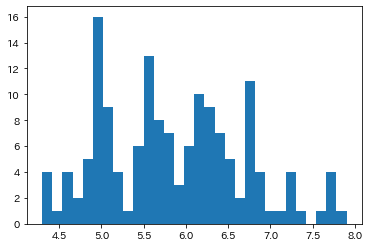

In [6]:
plt.hist(iris_df['sepal length (cm)'], bins=30)

### 課題2
課題1の graph に label を付け，判例を付与．さらに，title を fontsize 18 で追加（できれば xlabel, ylabel もやってほしいが）．
```
#plt.figure
plt.hist
#plt.xlabel
#plt.ylabel
plt.title
plt.legend
```

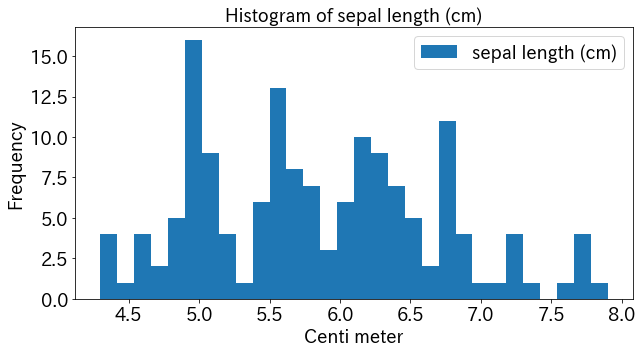

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(iris_df['sepal length (cm)'], bins=30)
plt.xlabel('Centi meter', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Histogram of sepal length (cm)', fontsize=18)
plt.legend(['sepal length (cm)'], fontsize=18)

### 発展課題１
fontsize を backend([rcParams](https://matplotlib.org/3.2.1/api/matplotlib_configuration_api.html#matplotlib.RcParams))で設定
```
plt.rcParams
#plt.figure
plt.hist
#plt.xlabel
#plt.ylabel
plt.title
plt.legend
```

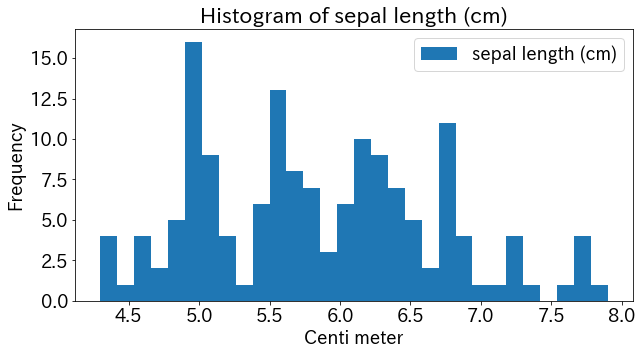

In [19]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 5))
plt.hist(iris_df['sepal length (cm)'], bins=30)
plt.xlabel('Centi meter')
plt.ylabel('Frequency')
plt.title('Histogram of sepal length (cm)')
plt.legend(['sepal length (cm)'])

### 発展課題2
1行2列で可視化しよう（subplot の使用）
```
plt.rcParams
#plt.figure
plt.hist
#plt.xlabel
#plt.ylabel
plt.title
plt.legend
```

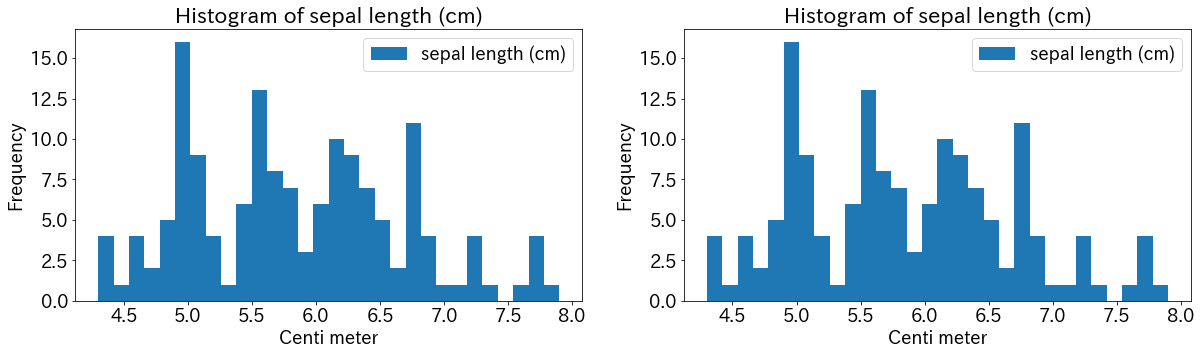

In [20]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(iris_df['sepal length (cm)'], bins=30)
plt.xlabel('Centi meter')
plt.ylabel('Frequency')
plt.title('Histogram of sepal length (cm)')
plt.legend(['sepal length (cm)'])
plt.subplot(1, 2, 2)
plt.hist(iris_df['sepal length (cm)'], bins=30)
plt.xlabel('Centi meter')
plt.ylabel('Frequency')
plt.title('Histogram of sepal length (cm)')
plt.legend(['sepal length (cm)'])


## scatter

### 課題3
scatter を用いて，横を sepal width，縦を sepal length とする点を表示
```
plt.scatter
```

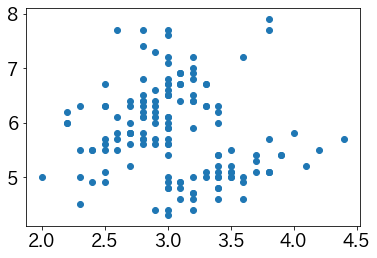

In [23]:
plt.scatter(iris_df['sepal width (cm)'], iris_df['sepal length (cm)'])

### 課題4
課題3の図に，横を petal width，縦を petal length とする緑色の点を追加で表示
```
plt.scatter
plt.scatter
```

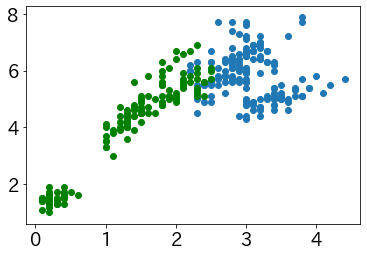

In [24]:
plt.scatter(iris_df['sepal width (cm)'], iris_df['sepal length (cm)'])
plt.scatter(iris_df['petal width (cm)'], iris_df['petal length (cm)'], color='g')

## plot
`y = x**2` の直線を plot

```[python]
x = np.linspace(0, 100, 10**5)
plt.
```

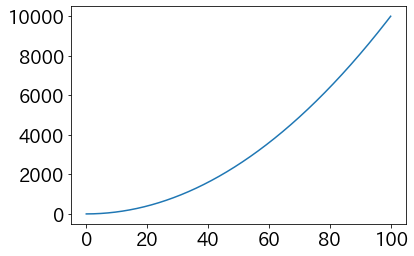

In [25]:
x = np.linspace(0, 100, 10**5)
plt.plot(x, x**2)